# Generating Correct Names
#### Rules
- 3 words
- First word can be male/female
- Second and third words must be males

In [1]:
from typing import List
import pandas as pd
import random
import string

from collections import Counter
from tqdm import tqdm

random.seed(23)

## Generate 2000 coorect names

In [2]:
names_df = pd.read_csv("data/Arabic_names.csv")
names_df.sample(10)

,Name,Gender
334,عذاري,F
371,فنن,F
1038,عزت,M
1128,فضيل,M
766,رائض,M
306,شيلاء,F
24,انشراف,F
430,مزنة,F
575,أرقم,M
473,ناجدة,F


In [3]:
male_names = names_df[names_df.Gender=='M']['Name'].tolist()
female_names = names_df[names_df.Gender=='F']['Name'].tolist()

In [4]:
def generate_fullnames(male_names: List[str], female_list: List[str] = None, num_names = 1000) -> List[str]:
    """
    Generates full names where second and third names must always be males.
    """
    random_range_male = (0, len(male_names)-1)
    if female_list:
        random_range_female = (0, len(female_names)-1)
    
    names = []

    for _ in range(num_names):
        # males
        names.append(" ".join(random.sample(male_names, 3)))
        # females
        if female_list:
            names.append(random.sample(female_names, 1)[0] + " " + " ".join(random.sample(male_names, 2)))
    
    return names

In [5]:
names = generate_fullnames(male_names, female_names, 5000)
names[:3]

['نصر ساعف ياسر', 'إيمان أخطب قطامي', 'سعيد عبدالرشيد ضياء']

In [6]:
pd.DataFrame(names, columns=["Name"]).to_csv("data/full_correct_names.csv", index=None)

In [7]:
temp_df = pd.read_csv("data/full_correct_names.csv")
temp_df.head()

,Name
0,نصر ساعف ياسر
1,إيمان أخطب قطامي
2,سعيد عبدالرشيد ضياء
3,ولهانة صادر جرير
4,منتظر داني زاكي


### Stats about our names 

(Max, Min, Mean)


(10, 2, 4.441992882562277)

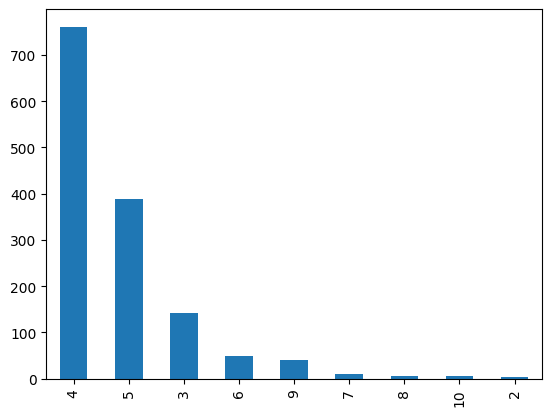

In [8]:
names_df['Name'].str.len().value_counts().plot.bar()
print("(Max, Min, Mean)")
names_df['Name'].str.len().max(), names_df['Name'].str.len().min(), names_df['Name'].str.len().mean()

In [9]:
# names with more than one word
temp_df[temp_df['Name'].str.split().str.len() > 1]

,Name
0,نصر ساعف ياسر
1,إيمان أخطب قطامي
2,سعيد عبدالرشيد ضياء
3,ولهانة صادر جرير
4,منتظر داني زاكي
...,...
9995,راسخة ظاهر مجاور
9996,صائن عتابة فوزي
9997,حسناء أمية فادي
9998,جابر خالد ربحي


# Generating Bad Names
generate individual full names:
- total garbage - 500
  - we can randomly shuffle the correct names
- mistype names - 500
  - repeat random characters
- other correct words but not names - 500
- mix of all of above - 500

### Helper functions 

### Generate names with repeated characters between 1, 2

In [10]:
def repeat_characters(name: str, num_repeats: int) -> str:
    """
    Repeat random characters for a num of repeats, randomly turned off(to reduce the number of repeats) so words are not recognizably long.
    """
    new_name: str = ""
    for idx, ch in enumerate(name):
        if random.randint(0, 1):
            reps = num_repeats
        else:
            reps = 1
        new_name += ch * random.randint(1, reps)
    
    return new_name

In [11]:
repeat_characters("مريم", 2)

'مرريم'

In [12]:
repeated_names = []
for name in names_df.iloc[:, 0].values:
    repeated_names.append(repeat_characters(name, 2))
    
repeated_names[:10]

['ابتساام',
 'ابتهاج',
 'ابتتهال',
 'اجتهااد',
 'اازدهارر',
 'ااعتددال',
 'اعتمماد',
 'اففتخارر',
 'اففتككار',
 'اللبتول']

### Get some random but correct words from the internet

In [13]:
df = pd.read_csv("data/ar_reviews_100k.tsv", sep="\t")
df.head()

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...


In [14]:
word_counter = Counter()

for sent in tqdm(df.iloc[:, 1], total=df.shape[0]):
    # remove Punctuation first
    sent = sent.translate(str.maketrans('', '', string.punctuation))
    word_counter.update(sent.split())

print(f"Number of words: {len(word_counter)}")
some_common_words = word_counter.most_common()[10_000: 11_405]
some_common_words = [i[0] for i in some_common_words]

100%|███████████████████████████████████████████████████████████| 99999/99999 [00:03<00:00, 25078.19it/s]


Number of words: 351992


### Total Garabage

In [15]:
garbage_names = []

for name in names_df.iloc[:, 0].values:
    name = list(name)
    random.shuffle(name)
    garbage_names.append("".join(name))
    
garbage_names[:10]

['ااسمتب',
 'ااجتبه',
 'هباتلا',
 'اهتجدا',
 'ازارده',
 'دعالات',
 'دماتعا',
 'تارخفا',
 'تااكفر',
 'ولباتل']

## Generating Bad Names
- [x] total garbage
- [x] repeated
- [x] correct words but not names
- [x] mix

In [16]:
# garbage
bad_names = []
bad_names.extend(generate_fullnames(garbage_names, num_names=2500))

# repeated
bad_names.extend(generate_fullnames(repeated_names, num_names=2500))

# correct but not names
bad_names.extend(generate_fullnames(some_common_words, num_names=2500))

# mix
bad_names.extend(generate_fullnames(garbage_names+repeated_names+some_common_words, num_names=2500))

In [17]:
len(bad_names)

10000

In [18]:
pd.DataFrame(bad_names, columns=["Name"]).to_csv("data/full_bad_names.csv", index=None)

In [19]:
temp_df = pd.read_csv("data/full_bad_names.csv")
temp_df.sample(5)

,Name
8729,بلاغة رعةبا ريذن
8086,منعم ممننتهىى اسبقة
8669,ولدي عبددااللححكيمم أأففنان
8761,الانحطاط ننجيبةة باسط
1722,يدبا افيش ضار


# Making the Dataset

In [20]:
df_correct = pd.read_csv("data/full_correct_names.csv")
df_incorrect = pd.read_csv("data/full_bad_names.csv")

In [21]:
full_df = df_correct.copy()
full_df['class'] = 1
full_df = pd.concat([full_df, df_incorrect], ignore_index=True)
full_df.fillna(0, inplace=True)
full_df

,Name,class
0,نصر ساعف ياسر,1.0
1,إيمان أخطب قطامي,1.0
2,سعيد عبدالرشيد ضياء,1.0
3,ولهانة صادر جرير,1.0
4,منتظر داني زاكي,1.0
...,...,...
19995,مسمل يبةره اعطى,0.0
19996,سعيلماإ تعارف رامزز,0.0
19997,سفينة جبر وم أثلكم,0.0
19998,طريقا ومافيه مثيرا,0.0


In [22]:
full_df.to_csv("data/dataset.csv", index=False)
temp_df = pd.read_csv("data/dataset.csv")
temp_df.sample(5)

,Name,class
5612,أشقر ظفار فارع,1.0
2028,أشقر عيضة فطين,1.0
2056,سرور غضنفر حصيف,1.0
1990,فهمي عبدالكريم نهيان,1.0
12660,ععبدالحفيظ دريد إجللالل,0.0
